In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_pulse
from stochastic_tests import Test

t_fin = 20.0
num_steps = int(100 * t_fin)

test = Test(model=model_pulse(),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=False)

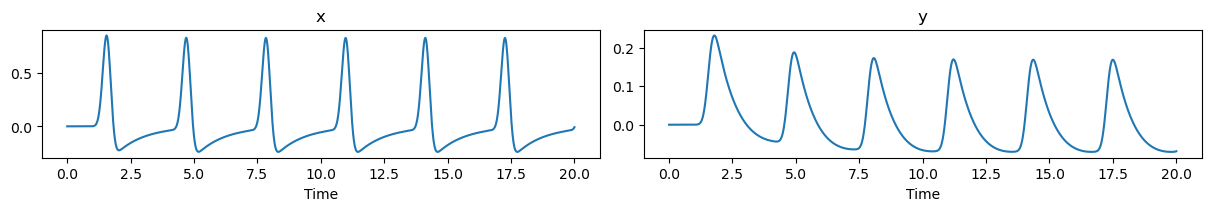

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

In [3]:
test.model.param_dists = {
    'k': ('norm', (1.0, 0.5))
}

label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

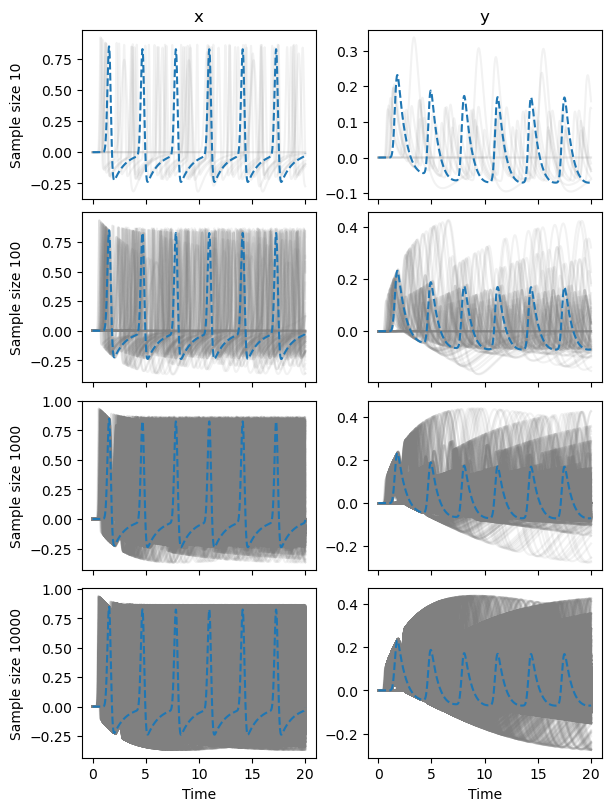

In [4]:
_ = test.plot_results_stochastic()

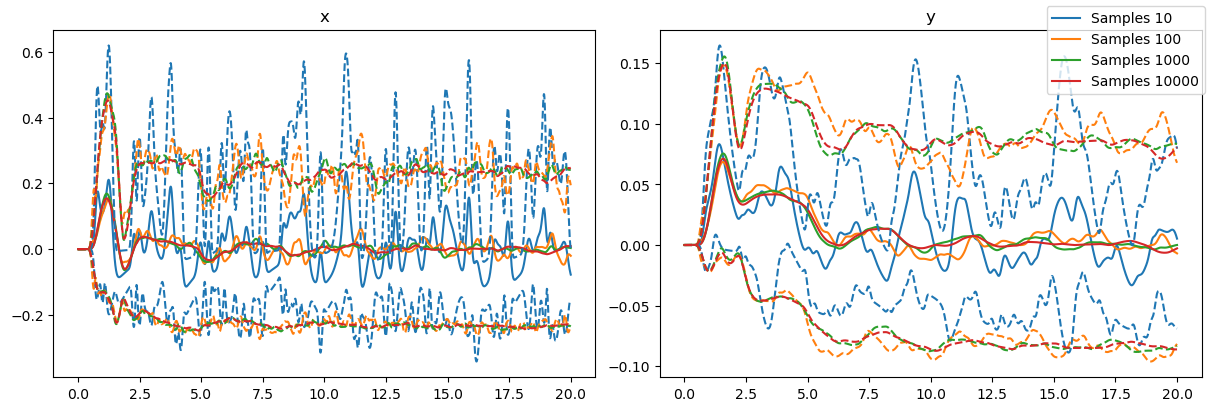

In [5]:
_ = test.plot_stats()

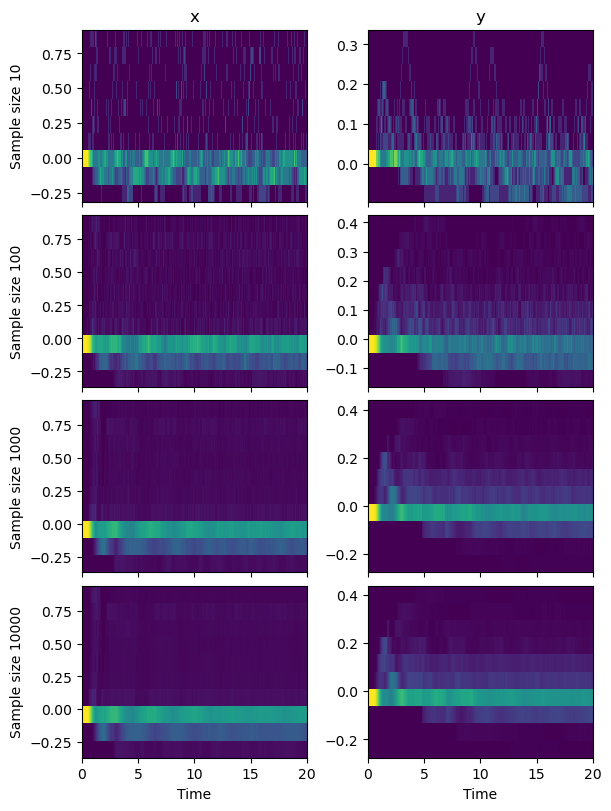

In [6]:
_ = test.plot_distributions()

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()

In [8]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	x: 1.9068301219622328
	y: 1.9347518154905357
100 trials
	x: 0.7471904948670055
	y: 0.7042234762799243
1000 trials
	x: 0.19996487599998392
	y: 0.21131650788579284
10000 trials
	x: 0.0660669644820789
	y: 0.06001734683706622


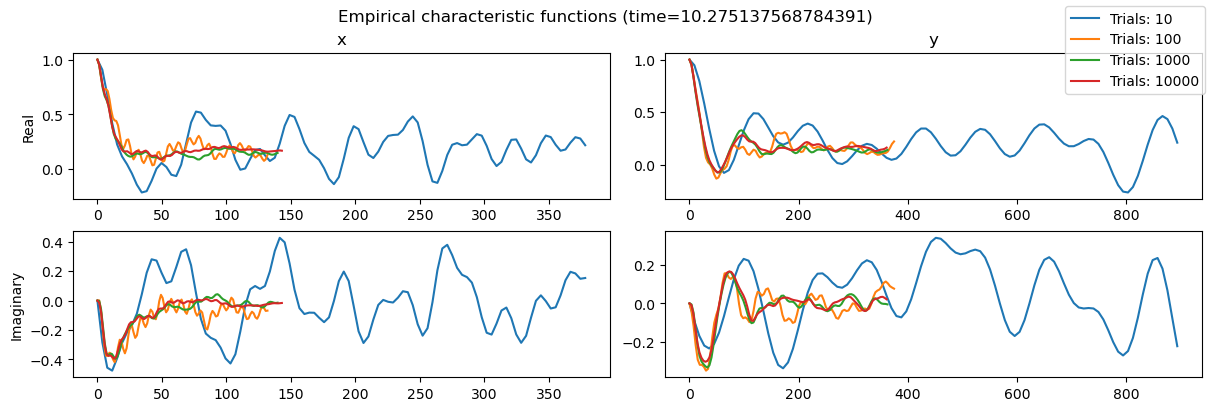

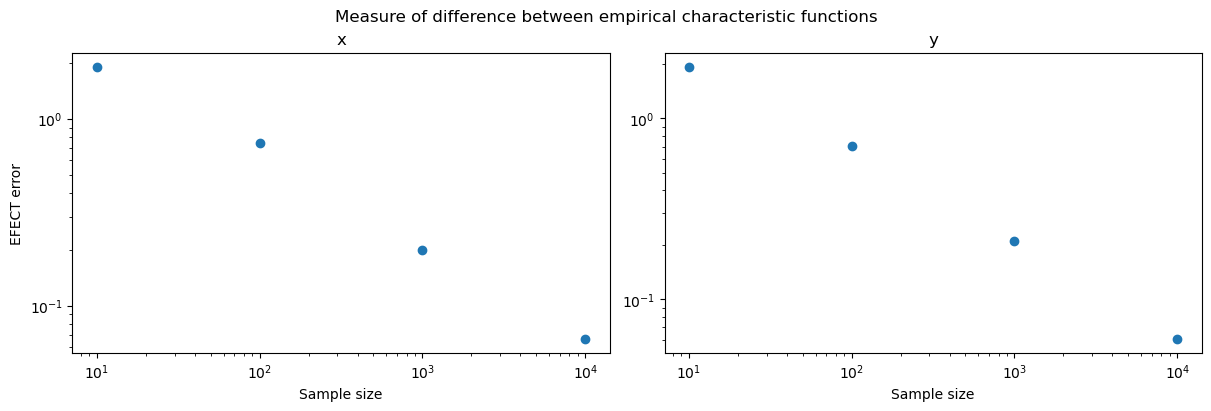

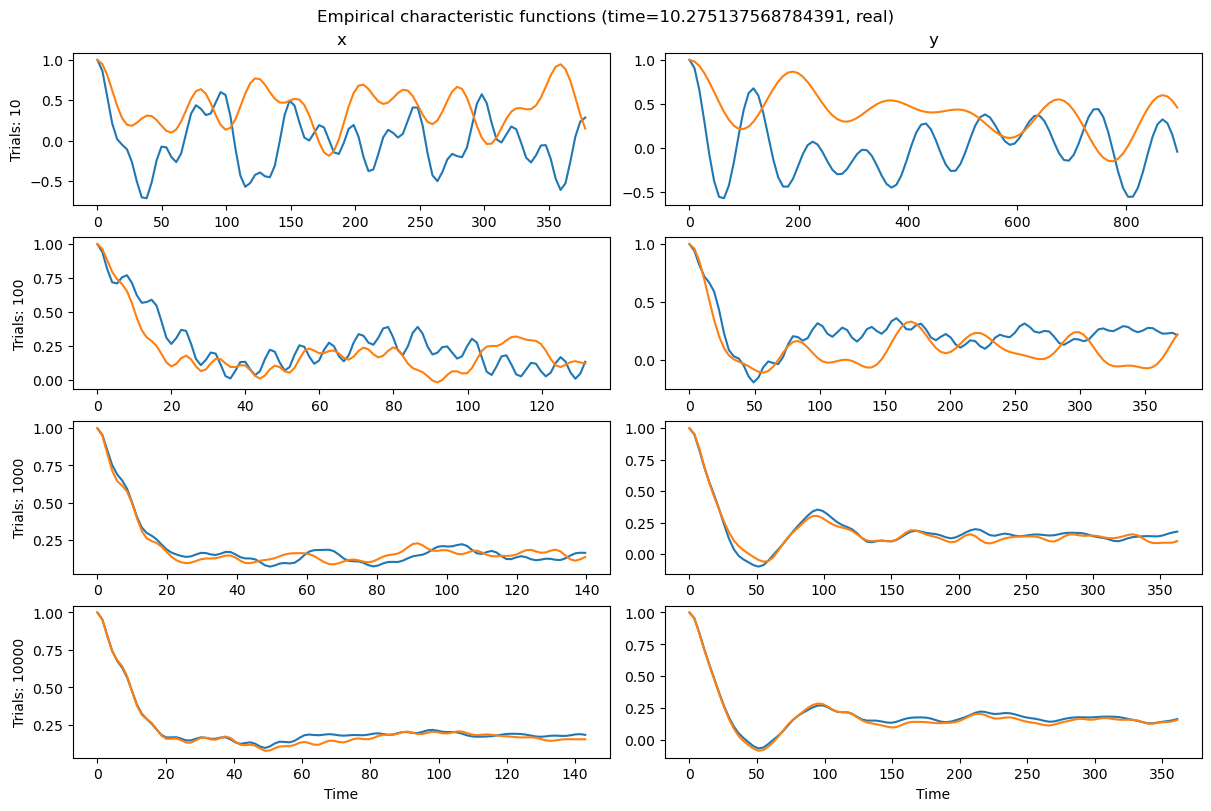

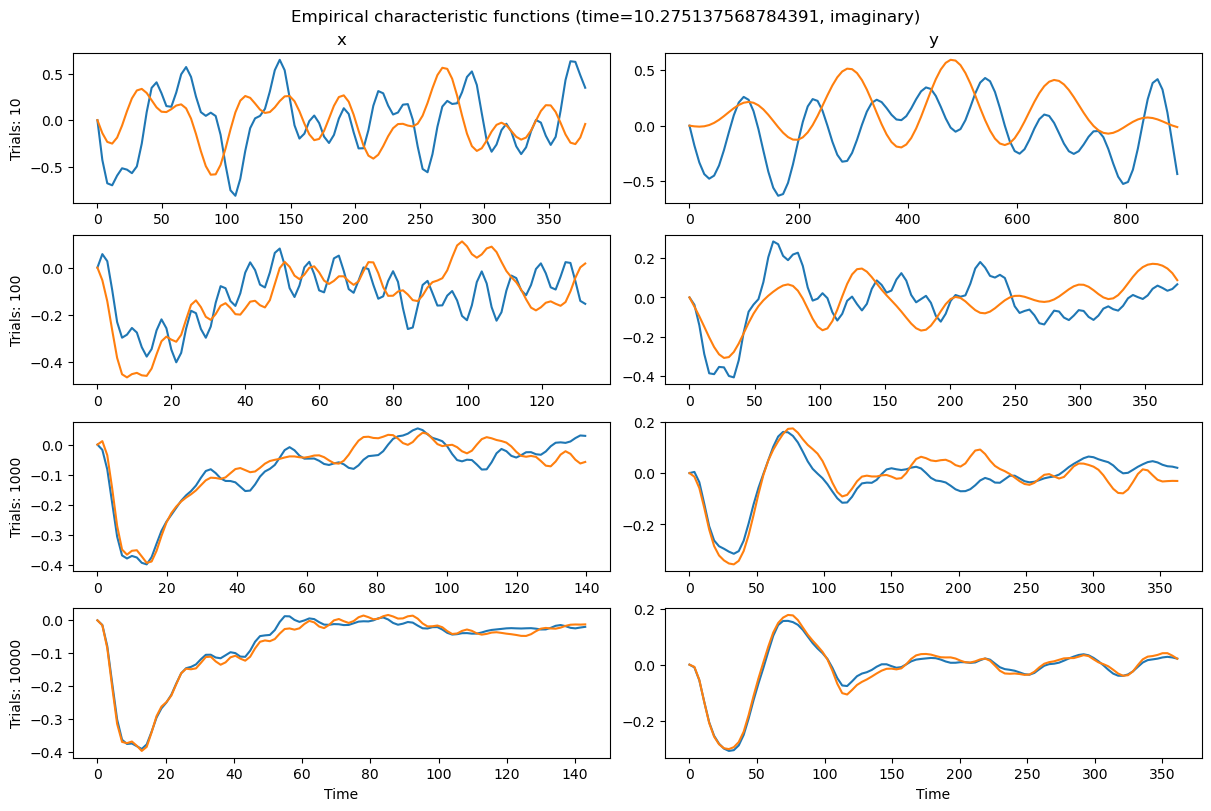

In [9]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [10]:
test.generate_ecf_diff_fits()

/home/timothy.sego/PycharmProjects/ssr_project_2024/code/stochastic_repro.py:994: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


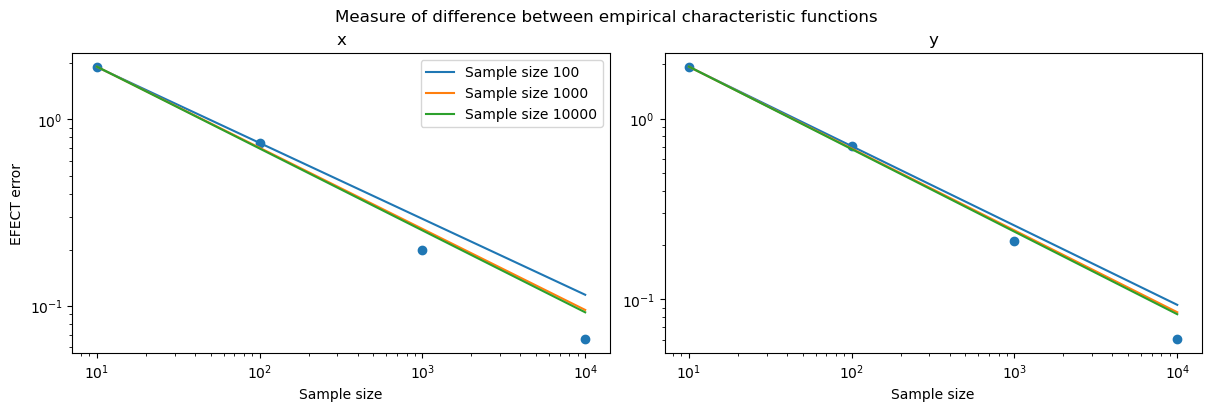

In [11]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [12]:
# Runtime: ~64 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

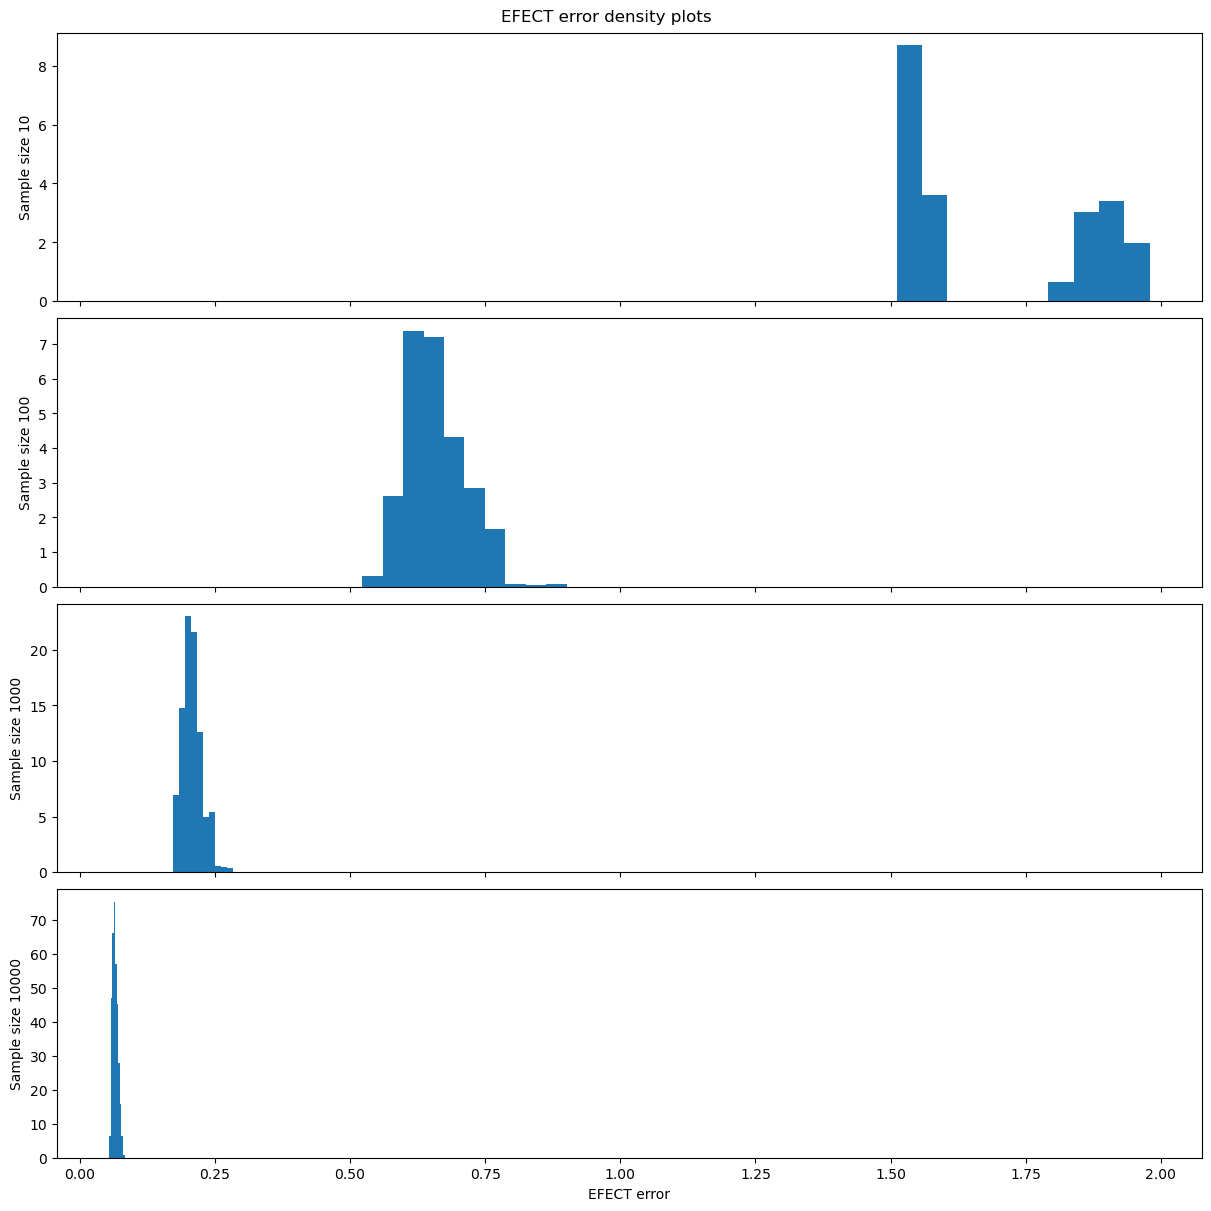

In [13]:
_ = test.plot_ks_sampling()

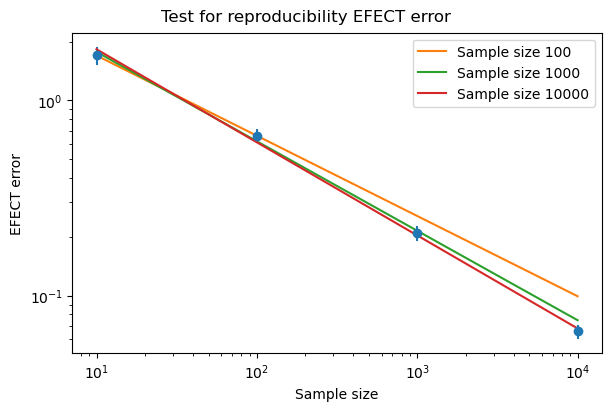

In [14]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()